In [220]:
#importing useful librabries
import numpy as np
import numpy.matlib
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
#reading data
df = pd.read_csv('/Users/atifsiddiqui/Documents/Spring_2021/EECS_738/Iris/Iris.csv', engine ='python', header= None,index_col = False, names = ['id','sepal_length','sepal_width','petal_length','petal_width','iris_class'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            151 non-null    object
 1   sepal_length  151 non-null    object
 2   sepal_width   151 non-null    object
 3   petal_length  151 non-null    object
 4   petal_width   151 non-null    object
 5   iris_class    151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [222]:
#I have decided to pick only 2 columns from the dataset as this would help understand how K-means work
cluster_data = df[['sepal_length','petal_length']].copy(deep=True)
#This code line drops the null values in the dataset
cluster_data.dropna(axis=0, inplace=True)
#Sorting sepal_lenght and petal_lenght, so the initial centroids will be suboptimal and we can see how the algoritm is able to converge to better centrioids
cluster_data.sort_values(by=['sepal_length','petal_length'], inplace=True)
#storing the data as an array 
cluster_array = np.array(cluster_data)

In [223]:
#visualizing data
print(cluster_array)

[['4.3' '1.1']
 ['4.4' '1.3']
 ['4.4' '1.3']
 ['4.4' '1.4']
 ['4.5' '1.3']
 ['4.6' '1.0']
 ['4.6' '1.4']
 ['4.6' '1.4']
 ['4.6' '1.5']
 ['4.7' '1.3']
 ['4.7' '1.6']
 ['4.8' '1.4']
 ['4.8' '1.4']
 ['4.8' '1.6']
 ['4.8' '1.6']
 ['4.8' '1.9']
 ['4.9' '1.4']
 ['4.9' '1.5']
 ['4.9' '1.5']
 ['4.9' '1.5']
 ['4.9' '3.3']
 ['4.9' '4.5']
 ['5.0' '1.2']
 ['5.0' '1.3']
 ['5.0' '1.4']
 ['5.0' '1.4']
 ['5.0' '1.5']
 ['5.0' '1.6']
 ['5.0' '1.6']
 ['5.0' '1.6']
 ['5.0' '3.3']
 ['5.0' '3.5']
 ['5.1' '1.4']
 ['5.1' '1.4']
 ['5.1' '1.5']
 ['5.1' '1.5']
 ['5.1' '1.5']
 ['5.1' '1.6']
 ['5.1' '1.7']
 ['5.1' '1.9']
 ['5.1' '3.0']
 ['5.2' '1.4']
 ['5.2' '1.5']
 ['5.2' '1.5']
 ['5.2' '3.9']
 ['5.3' '1.5']
 ['5.4' '1.3']
 ['5.4' '1.5']
 ['5.4' '1.5']
 ['5.4' '1.7']
 ['5.4' '1.7']
 ['5.4' '4.5']
 ['5.5' '1.3']
 ['5.5' '1.4']
 ['5.5' '3.7']
 ['5.5' '3.8']
 ['5.5' '4.0']
 ['5.5' '4.0']
 ['5.5' '4.4']
 ['5.6' '3.6']
 ['5.6' '3.9']
 ['5.6' '4.1']
 ['5.6' '4.2']
 ['5.6' '4.5']
 ['5.6' '4.9']
 ['5.7' '1.5']
 ['5.7' '1

In [224]:
#during visualization we see that the last row contains the column names. We need to get rid of it and also convert the type pf our arrat to float64
n= 1
cluster_array = cluster_array[:-1, :]
cluster_array = cluster_array.astype('float64')

In [262]:
print(cluster_array)

[[4.3 1.1]
 [4.4 1.3]
 [4.4 1.3]
 [4.4 1.4]
 [4.5 1.3]
 [4.6 1. ]
 [4.6 1.4]
 [4.6 1.4]
 [4.6 1.5]
 [4.7 1.3]
 [4.7 1.6]
 [4.8 1.4]
 [4.8 1.4]
 [4.8 1.6]
 [4.8 1.6]
 [4.8 1.9]
 [4.9 1.4]
 [4.9 1.5]
 [4.9 1.5]
 [4.9 1.5]
 [4.9 3.3]
 [4.9 4.5]
 [5.  1.2]
 [5.  1.3]
 [5.  1.4]
 [5.  1.4]
 [5.  1.5]
 [5.  1.6]
 [5.  1.6]
 [5.  1.6]
 [5.  3.3]
 [5.  3.5]
 [5.1 1.4]
 [5.1 1.4]
 [5.1 1.5]
 [5.1 1.5]
 [5.1 1.5]
 [5.1 1.6]
 [5.1 1.7]
 [5.1 1.9]
 [5.1 3. ]
 [5.2 1.4]
 [5.2 1.5]
 [5.2 1.5]
 [5.2 3.9]
 [5.3 1.5]
 [5.4 1.3]
 [5.4 1.5]
 [5.4 1.5]
 [5.4 1.7]
 [5.4 1.7]
 [5.4 4.5]
 [5.5 1.3]
 [5.5 1.4]
 [5.5 3.7]
 [5.5 3.8]
 [5.5 4. ]
 [5.5 4. ]
 [5.5 4.4]
 [5.6 3.6]
 [5.6 3.9]
 [5.6 4.1]
 [5.6 4.2]
 [5.6 4.5]
 [5.6 4.9]
 [5.7 1.5]
 [5.7 1.7]
 [5.7 3.5]
 [5.7 4.1]
 [5.7 4.2]
 [5.7 4.2]
 [5.7 4.5]
 [5.7 5. ]
 [5.8 1.2]
 [5.8 3.9]
 [5.8 4. ]
 [5.8 4.1]
 [5.8 5.1]
 [5.8 5.1]
 [5.8 5.1]
 [5.9 4.2]
 [5.9 4.8]
 [5.9 5.1]
 [6.  4. ]
 [6.  4.5]
 [6.  4.5]
 [6.  4.8]
 [6.  5. ]
 [6.  5.1]
 [6.1 4. ]
 [6.1 4.6]

In [264]:
# Calculate Euclidean distance between two observations
def EuclideanDistance(X1, X2,size):
    EuclideanDistance = 0
    for col in range (size):
        EuclideanDistance += pow((X2[col] - X1[col]), 2)
    EuclideanDistance = np.sqrt(EuclideanDistance)
    return (EuclideanDistance)

In [269]:
#Function calculates the distance between every dataset point and every centroids and 
#Assign dataset points to clusters based on closest centroid
#returns a list of each datapoint's cluster label
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        size = cluster_array.shape[1]
        for centroid in centroids:
            distances.append(EuclideanDistance(centroid, cluster_array[i], size))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [270]:
# Calculate new centroids based on each cluster's mean
# cluster_df is the concentration of cluster_arr,current cluster the datapoint belongs to and clusters.
# return a new list called new_centroids which are the mean of each datapoint
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [271]:
# Calculate variance within each cluster or how similar the datapoints within are cluster are to each other
# Filters cluster_df by cluster, calculate mean and then subtracts the cluster mean for each dataoint.
#repmat takes a given array and replicate it. 
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [276]:
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 42
1 27
2 26
3 26
4 26
5 24
6 20
7 15
8 14
9 14
10 13
11 13
12 13
13 13
14 12
15 12
16 12
17 12
18 12
19 12
20 12


<ipython-input-277-e24207812c74>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('initial_clusters', bpi=150)


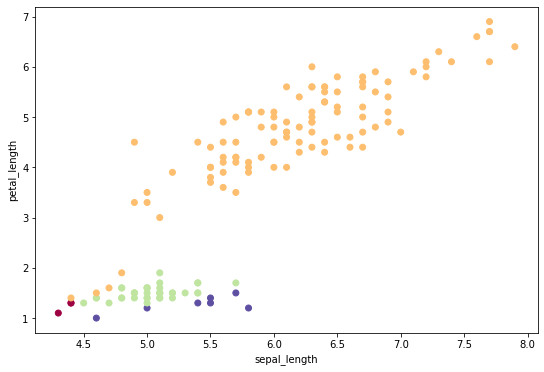

In [277]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('sepal_length')
plt.ylabel('petal_length');
plt.savefig('initial_clusters', bpi=150)

<ipython-input-278-7ba74445b9c4>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('final_clusters', bpi=150)


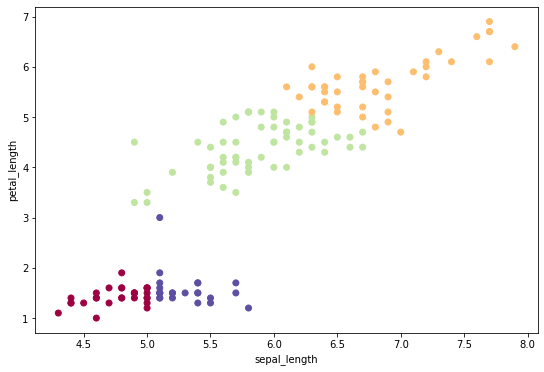

In [278]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('sepal_length')
plt.ylabel('petal_length');
plt.savefig('final_clusters', bpi=150)